# LAB 2 EDA
## Zeel Mehta 21BAI1533

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

# PART 1

### Create a data frame

In [98]:
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],

'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],

'age': [42, np.nan, 36, 24, 73],

'sex': ['m', np.nan, 'f', 'm', 'f'],

'preTestScore': [4, np.nan, np.nan, 2, 3],

'postTestScore': [25, np.nan, np.nan, 62, 70]}

In [99]:
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])

In [100]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


## Drop the row, if any data contains “NaN” and Drop the row, where all the cells have “NaN”.

In [101]:
x=df.dropna()

In [102]:
x

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


## Create a new column called “location” with all missing values.

In [103]:
df.insert(loc=6,column='location',value=np.NaN)

In [104]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


## Drop column if they contains only a missing values

In [105]:
x=df.count(axis=1)

In [106]:
x=df.dropna(axis=1, how='all')

In [107]:
x

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


## Drop the rows that contain less than four observations

In [108]:
df = df.dropna(thresh=4)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


## Select the rows but ignore rows where any missing data points in a column “age” and “sex”.

In [109]:
df[~df['age'].isnull()]
df[~df['sex'].isnull()]

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


## Fill all the data with missing values of “ZERO”.

In [110]:
m

/var/folders/72/3kxng2yd5yn203b626zw3kpc0000gn/T/ipykernel_82267/3820675804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(value ='ZERO',inplace = True)


In [111]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,ZERO
2,Tina,Ali,36.0,f,ZERO,ZERO,ZERO
3,Jake,Milner,24.0,m,2.0,62.0,ZERO
4,Amy,Cooze,73.0,f,3.0,70.0,ZERO


# PART 2

### Read the file called "Data.csv"

### Apply the following lines of code and understand what is happening.

### X = dataSet.iloc[:,:-1].values #dataSet is data frame object.

### y= dataSet.iloc[:,:3].values

### Apply imputer strategy on “Mean” to the features “Age” and “Salary”.

In [112]:
d=pd.read_csv('/Users/zeelmehta/Desktop/Data.csv')

In [113]:
d

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [114]:
X = d.iloc[:,:-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [115]:
y= d.iloc[:,:3].values
y

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [116]:
from sklearn.impute import SimpleImputer

In [117]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
d[['Age','Salary']]=imputer.fit_transform(d[['Age','Salary']])

In [118]:
d

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


# PART 3

### Load the data set from the given URL

In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
b = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [6]:
b.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


### Understand the data set and identify the columns

In [7]:
b.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1012.000000,1012.000000,1012.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,180.143778,12.008350,16.834792,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,188.132839,17.250728,9.912616,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.257830,0.000000,8.375000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,24.021000,7.240000,18.100000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,391.435000,16.780000,21.890000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,396.900000,100.000000,50.000000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


### Find the type of each columns in the given data set.

In [8]:
b.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
dtype: object

### Draw the box plot for the feature “DIS” and print the IQR for each column.

<AxesSubplot:xlabel='7'>

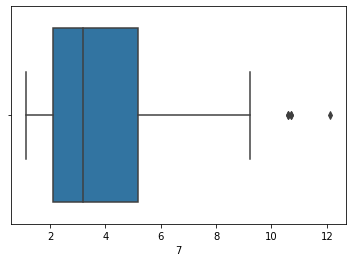

In [9]:
sns.boxplot(x=b[7])

In [10]:
def single_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))
b.apply(single_iqr)

0     391.17717
1      16.78000
2      13.51500
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
dtype: float64

### Draw the plot to visualize the correalaiton between each feature.

In [11]:
b

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


<AxesSubplot:>

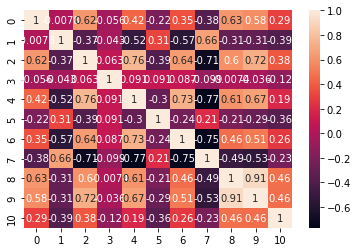

In [12]:
sns.heatmap(b.corr(), annot=True)

### Apply the histogram plot and find the inference out of it for the feature (PRICE).

<AxesSubplot:xlabel='10', ylabel='Count'>

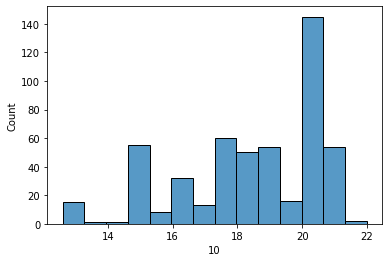

In [126]:
sns.histplot(data=b[10])

### Draw the scatter plot for the number of rooms Vs. value of house

<AxesSubplot:xlabel='5', ylabel='10'>

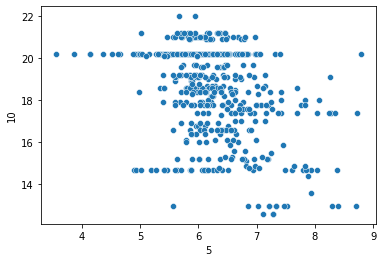

In [127]:
sns.scatterplot(data=b, x=5, y=10)